# 0. Préparation
**/!\ Veillez à exécuter ces informations à chaque fois que vous démarrerez ce notebook**



## 0.1. Connexion à une machine
Tout d'abord, vérifiez que le notebook est connecté à une machine. Pour ce faire, regarder en haut à droite. Si vous ne voyez pas la RAM et l'espace disque, alors le notebook n'est pas connecté. Cliquez dès lors sur le bouton *Connecter*.

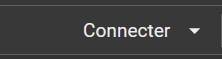

## 0.2. Connecter le notebook à un GPU
Ensuite, cliquez sur le bouton *Exécution*, *Modifier le type d'exécution* et choisissez *GPU*. Si demandé, acceptez de réexécuter l'environnement.

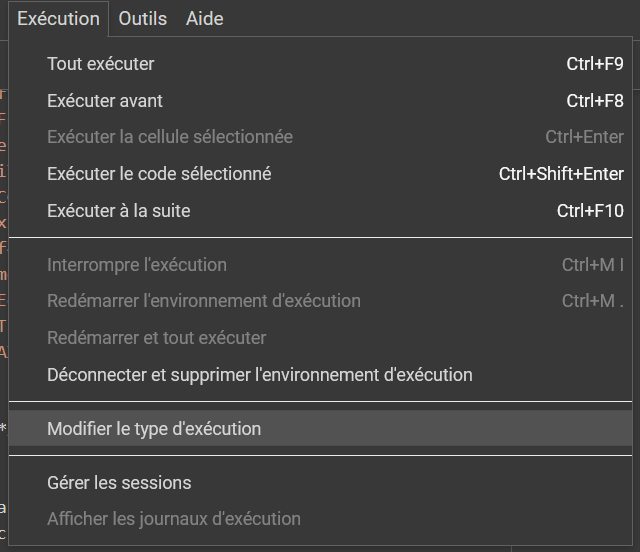

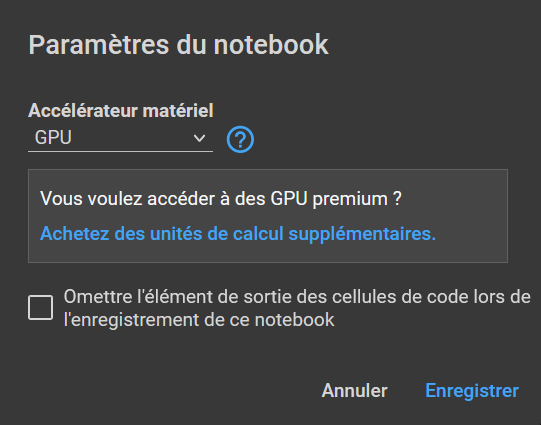

## 0.3. Installation du dataset

Commencez par téléchargez sur Moodle les fichiers *fake_train.csv* et *fake_test.csv* et placez-les dans votre Google Drive dans votre répertoire de travail.

## 0.4. Connecter le notebook à Google Drive
Exécutez ensuite les deux prochains blocs pour connecter le notebook à votre Google Drive. N'oubliez pas de changer *MYPATH* par le chemin vers le dossier sur Google Drive où seront stockées les données nécessaires.

Si l'un des dossiers du chemin contient un espace, ajoutez le symbole \ devant chaque espace.
Par exemple, si vous souhaitez stocker les données dans le répertoire *Défis IA/NLP*, remplacez *MYPATH* par *Défis\ IA/NLP*.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/Colab\ Notebooks/DefiIA/2022-2023

/content/drive/My Drive/Colab Notebooks/DefiIA/2022-2023


## 0.5. Installation de librairies

In [3]:
!pip install transformers
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## 0.6. Importation de librairies utiles

In [1]:
import os
import numpy as np
np.set_printoptions(edgeitems=3, infstr='inf', linewidth=150, nanstr='nan', precision=3, suppress=False, threshold=1000, formatter=None)

# 1. Chargement de la base de données

## 1.1. Chargement pour sklearn

Le bout de code suivant montre comment charger le dataset du challenge pour sklearn. Le corpus se trouve donc dans la variable *ds_train['data']* et les labels dans *ds_train['label']*.

In [2]:
import pandas as pd
ds_train = pd.read_csv('fake_train.csv')
ds_test = pd.read_csv('fake_test.csv')

print("Nombre de news")
print(len(ds_train))
print("")
print("Affichage de la 1ère news")
print()
print("")
print("Label de la 1ère news")
print(ds_train['label'][0])

Nombre de news
1458

Affichage de la 1ère news
Au 22e jour consécutif de la grève reconductible contre la réforme des retraites (soit autant de jours que le long conflit de 1995), le taux de grévistes à la SNCF a légèrement baissé à 9,6 % jeudi matin, contre 9,8 % mardi, selon la direction du groupe public. Parmi les personnels indispensables à la circulation des trains, moins de la moitié des conducteurs (42,1 %) et le quart (24 %) des contrôleurs étaient grévistes, des taux en recul par rapport à mardi (49,3 % chez les conducteurs), jour du réveillon de Noël et précédent jour de publication de ces taux. Le taux des aiguilleurs en grève a légèrement augmenté, à 13,8 %.

Label de la 1ère news
0


In [3]:
print(ds_train)

      Unnamed: 0                                               data  label  \
0              0  Au 22e jour consécutif de la grève reconductib...      0   
1              1  Depuis plusieurs mois, les initiatives des che...      0   
2              2  Google vient d'introduire une  mise à jour  de...      0   
3              3  Portrait.  Chacun s’empresse autour d’elle tan...      0   
4              4  « Il n’y a pas de risque de pénurie » de carbu...      0   
...          ...                                                ...    ...   
1453        1453  « Sur les 15000 biographies consacrées au prés...      1   
1454        1454  La mobilisation des Gilets Jaunes continue ce ...      1   
1455        1455   Le très célèbre et très renommé Stephen Hawki...      1   
1456        1456  298 euros. C’est la somme totale qu’aura dépen...      1   
1457        1457  Ainsi François Pinault a annoncé dans un premi...      1   

     target_name  
0           News  
1           News  
2     

# 1.2. Chargement pour les transformers de Huggingface

In [4]:
from datasets import load_dataset

dataset_train = load_dataset("csv", data_files="fake_train.csv", split='train')
dataset_test = load_dataset("csv", data_files="fake_test.csv", split='train')
# Comme les fichiers sont stockés séparément, le dataset ne contient pas
# explicitement un split "train" et un split "test" comme c'est
# généralement le cas avec Huggingface.
# C'est pourquoi nous utilisons aussi split='train' pour le test set

print("Nombre de news")
print(len(dataset_train))
print("")
print("Affichage de la 1ère news")
print(dataset_train[0])
print("")
print("Contenu de la 1ère news")
print(dataset_train[0]['data'])
print("")
print("Label de la 1ère news")
print("{} => {}".format(dataset_train[0]['label'], dataset_train[0]['target_name']))
print("")

print("Affichage de la dernière news")
print(dataset_train[-1])
print("")
print("Contenu de la dernière news")
print(dataset_train[-1]['data'])
print("")
print("Label de la dernière news")
print("{} => {}".format(dataset_train[-1]['label'], dataset_train[-1]['target_name']))

c:\Users\odanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 1458 examples [00:00, 30289.78 examples/s]
Generating train split: 486 examples [00:00, 24898.40 examples/s]

Nombre de news
1458

Affichage de la 1ère news
{'Unnamed: 0': 0, 'data': 'Au 22e jour consécutif de la grève reconductible contre la réforme des retraites (soit autant de jours que le long conflit de 1995), le taux de grévistes à la SNCF a légèrement baissé à 9,6 % jeudi matin, contre 9,8 % mardi, selon la direction du groupe public. Parmi les personnels indispensables à la circulation des trains, moins de la moitié des conducteurs (42,1 %) et le quart (24 %) des contrôleurs étaient grévistes, des taux en recul par rapport à mardi (49,3 % chez les conducteurs), jour du réveillon de Noël et précédent jour de publication de ces taux. Le taux des aiguilleurs en grève a légèrement augmenté, à 13,8 %.', 'label': 0, 'target_name': 'News'}

Contenu de la 1ère news
Au 22e jour consécutif de la grève reconductible contre la réforme des retraites (soit autant de jours que le long conflit de 1995), le taux de grévistes à la SNCF a légèrement baissé à 9,6 % jeudi matin, contre 9,8 % mardi, selon l